# Pre-owned car price prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

## Loading and data cleaning

In [3]:
df= pd.read_csv("../datasets/Final_dataset.csv")
df.head()

Car_name  Km_driven  Selling_price  Model Gear_box Fuel_type   
0  MarutiCelerio      42000         675000   2016   Manual    Petrol  \
1    ToyotaHilix      62000         900000   2013   Manual    Diesel   
2         AltoLX      95000         270000   2010   Manual    Petrol   
3        Wagoner      60000         300000   2008   Manual    Petrol   
4         Camper      80000         717000   2019   Manual    Petrol   

  Drive_type  Color Air_con Location  
0      Right  White     Yes  Thimphu  
1      Right   Blue     Yes  Thimphu  
2      Right  Black     Yes  Thimphu  
3      Right  Black     Yes  Thimphu  
4      Right  Black     Yes  Thimphu

In [4]:
df.shape

(1400, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_name       1400 non-null   object
 1   Km_driven      1400 non-null   int64 
 2   Selling_price  1400 non-null   int64 
 3   Model          1400 non-null   int64 
 4   Gear_box       1400 non-null   object
 5   Fuel_type      1400 non-null   object
 6   Drive_type     1400 non-null   object
 7   Color          1400 non-null   object
 8   Air_con        1400 non-null   object
 9   Location       1400 non-null   object
dtypes: int64(3), object(7)
memory usage: 109.5+ KB


In [6]:
df.isnull().sum()

Car_name         0
Km_driven        0
Selling_price    0
Model            0
Gear_box         0
Fuel_type        0
Drive_type       0
Color            0
Air_con          0
Location         0
dtype: int64

In [7]:
print(df.Fuel_type.value_counts())
print(df.Gear_box.value_counts()) 


Fuel_type
Diesel    698
Petrol    688
CNG         8
LPG         6
Name: count, dtype: int64
Gear_box
Manual       1210
Automatic     190
Name: count, dtype: int64


In [8]:
df.Gear_box.unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
df.Fuel_type.unique()

array(['Petrol', 'Diesel', 'LPG', 'CNG'], dtype=object)

In [10]:
df.Model.unique()

array([2016, 2013, 2010, 2008, 2019, 2015, 2017, 2021, 2005, 2011, 2014,
       2009, 2003, 2018, 2007, 2012, 2020, 2006, 2002, 2000, 1999, 2004,
       2001, 1996], dtype=int64)

## Data Analysis

In [11]:
df1 = df.drop(['Drive_type' ],axis=1).reindex(['Car_name','Model','Gear_box', 'Fuel_type','Km_driven', 'Selling_price'],axis=1)
df1.head()

Car_name  Model Gear_box Fuel_type  Km_driven  Selling_price
0  MarutiCelerio   2016   Manual    Petrol      42000         675000
1    ToyotaHilix   2013   Manual    Diesel      62000         900000
2         AltoLX   2010   Manual    Petrol      95000         270000
3        Wagoner   2008   Manual    Petrol      60000         300000
4         Camper   2019   Manual    Petrol      80000         717000

In [12]:
df1.isnull().sum()

Car_name         0
Model            0
Gear_box         0
Fuel_type        0
Km_driven        0
Selling_price    0
dtype: int64

Text(0.5, 1.0, 'Model vs Selling Price')

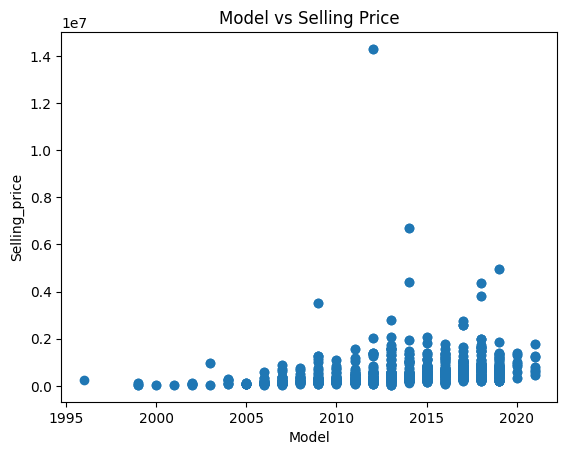

In [13]:
plt.scatter(x=df["Model"], y=df["Selling_price"])
plt.xlabel("Model")
plt.ylabel("Selling_price")
plt.title("Model vs Selling Price")

Text(0.5, 1.0, 'Kilometer Driven vs Selling Price')

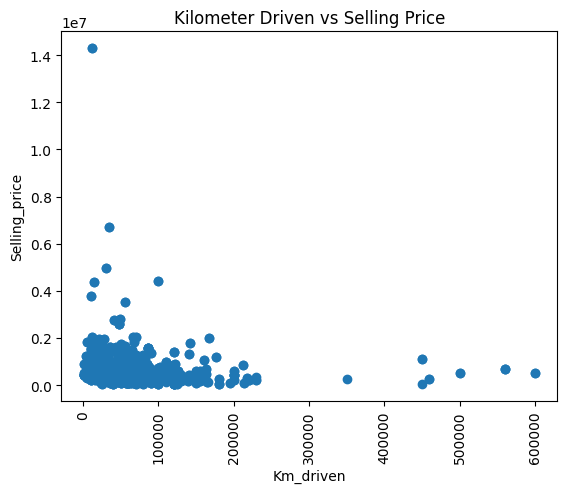

In [14]:
plt.scatter(x=df["Km_driven"], y=df["Selling_price"])
plt.xlabel("Km_driven")
plt.xticks(rotation=90)
plt.ylabel("Selling_price")
plt.title("Kilometer Driven vs Selling Price")

Text(0.5, 1.0, 'Fuel Type vs Selling Price')

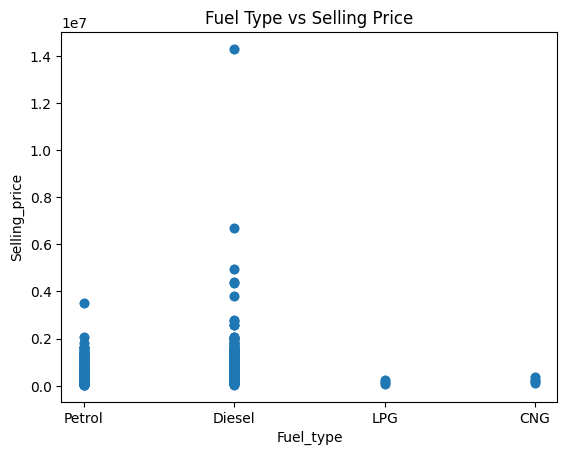

In [15]:
plt.scatter(x=df["Fuel_type"], y=df["Selling_price"])
plt.xlabel("Fuel_type")
plt.ylabel("Selling_price")
plt.title("Fuel Type vs Selling Price")

Text(0.5, 1.0, 'Gear Type vs Selling Price')

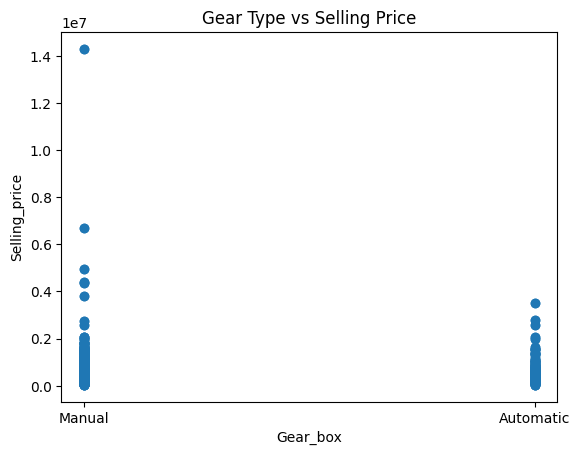

In [16]:
plt.scatter(x=df["Gear_box"], y=df["Selling_price"])
plt.xlabel("Gear_box")
plt.ylabel("Selling_price")
plt.title("Gear Type vs Selling Price")

## Manual & Automatic

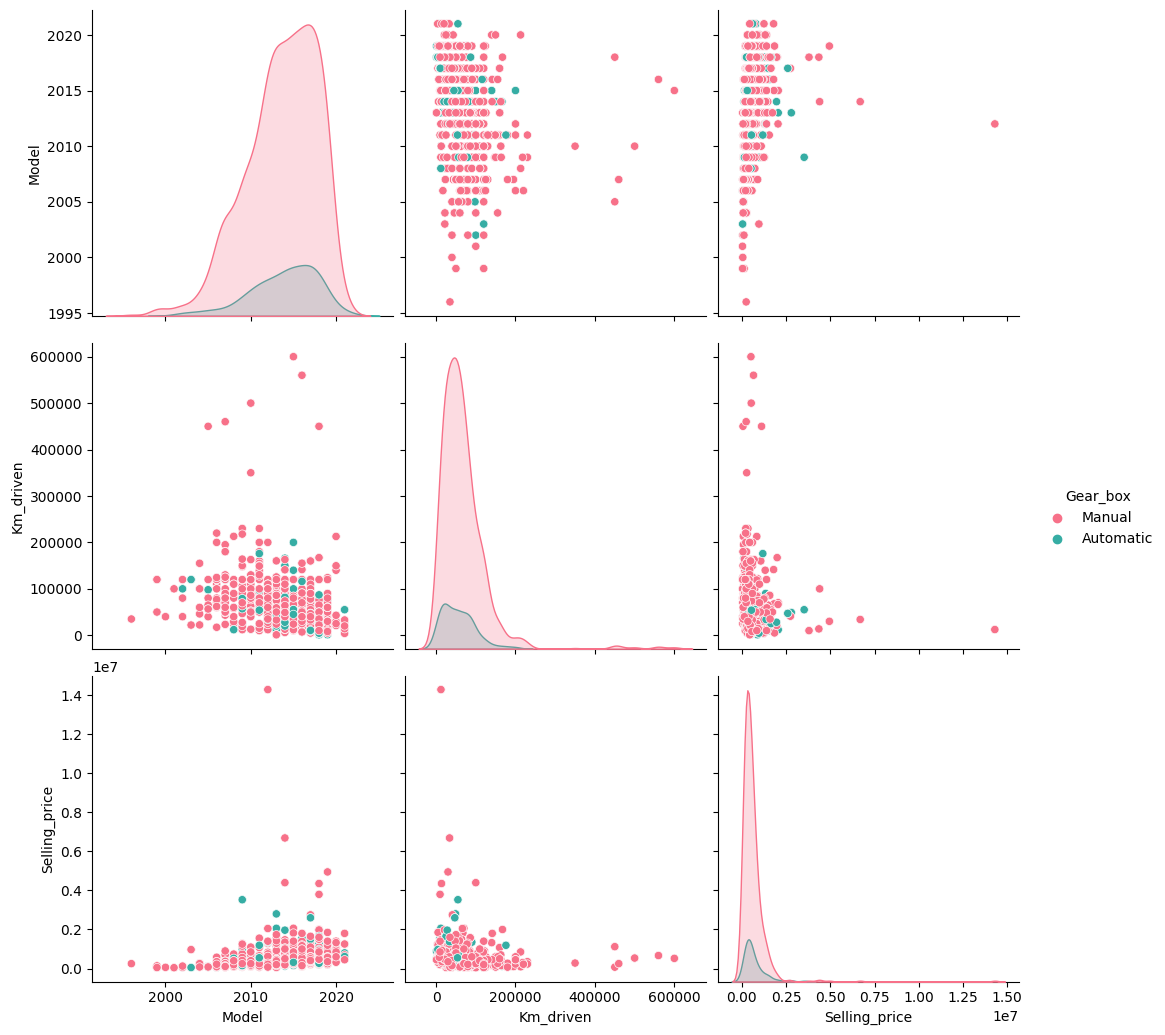

In [17]:
sns.pairplot(df1,hue = 'Gear_box',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()


Automatic cars and manual second hand car have almost same price.There is little increase of automatic cars from 2010.



## Fuel type

In [18]:
df1.Fuel_type.value_counts()

Fuel_type
Diesel    698
Petrol    688
CNG         8
LPG         6
Name: count, dtype: int64

In [19]:
df2 = df1
df2.Fuel_type = df2.Fuel_type.map(lambda x: x if x in ['Diesel','Petrol'] else 'Others')
df2.Fuel_type.unique()

array(['Petrol', 'Diesel', 'Others'], dtype=object)

In [20]:
manual = df2[df2['Gear_box']=='Manual']
automatic = df2[df2['Gear_box']=='Automatic']

Manual type car


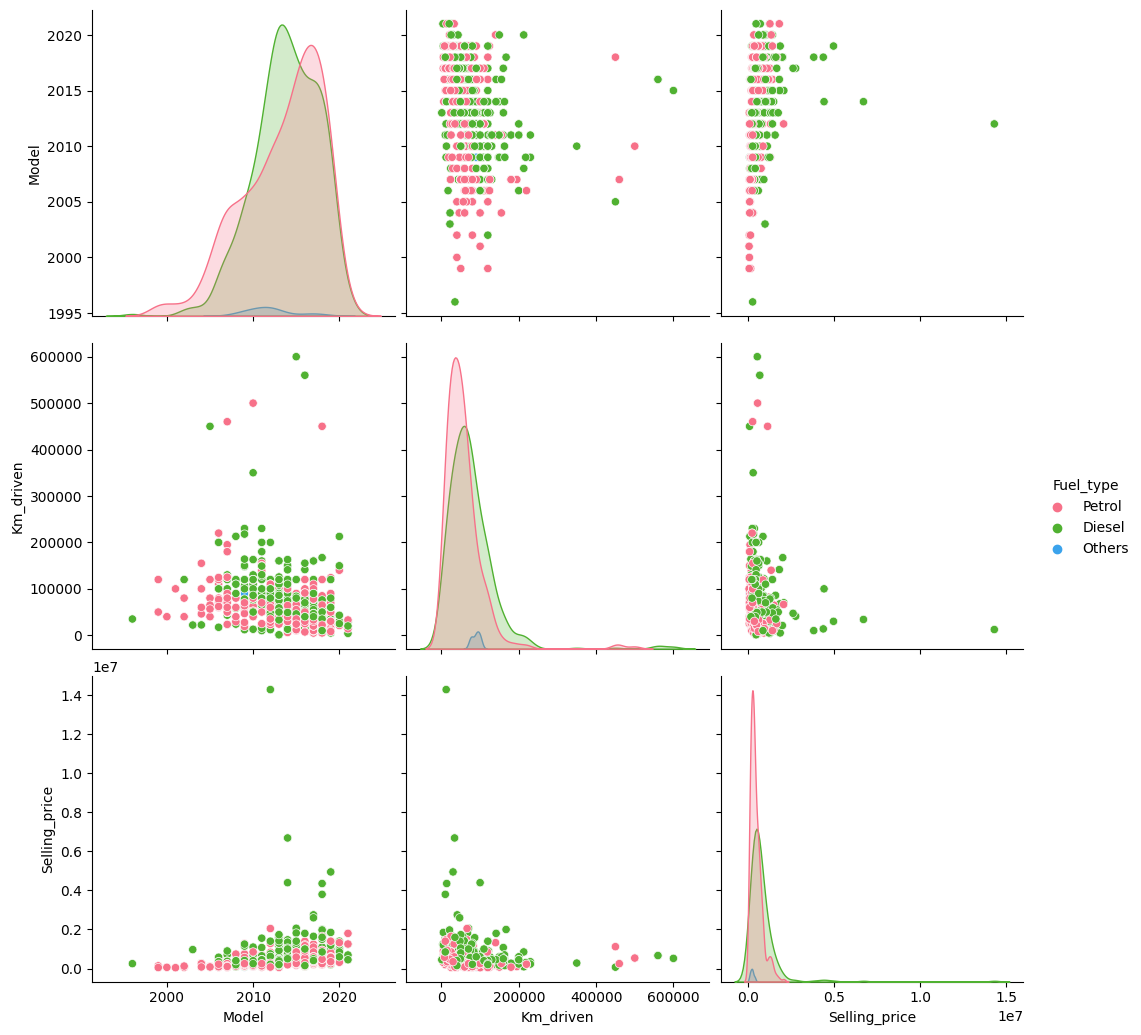

In [21]:
print('Manual type car')
sns.pairplot(manual,hue = 'Fuel_type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Automatic type car


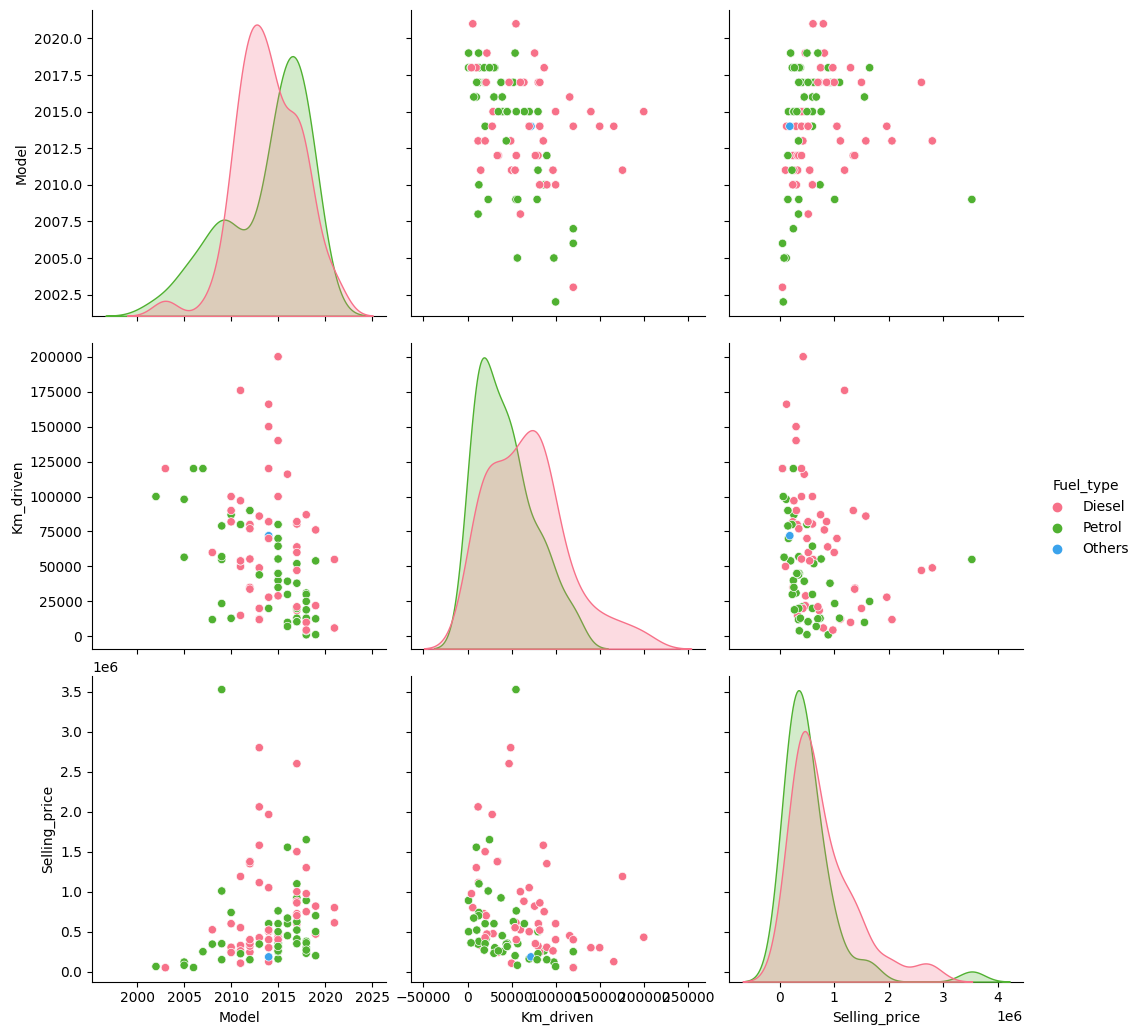

In [22]:
print('Automatic type car')
sns.pairplot(automatic,hue = 'Fuel_type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

# Outlier Detection

In [23]:
df2.groupby('Gear_box').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['Model'],axis=1)

TypeError: Could not convert BoleroMarutoVan SantroHondaCivicBoleroCamperBoleroCamperRenaultKWIDKUVkMarutiVitaraHyundaicretaMarutiBalenoKiaSonetMarutiSwiftFordEcoSportMarutiSwiftSuzukiAltoMahindraScorpioChevrolvetSonicVolkswagenGolfHyundaiSonataMahindraXyloAudiAHyundaiEONHyundaiAccentMahindraBoleraMahindraBoleraToyotaCorollaToyotaCorollaMarutiSwiftChevroletEnjoyFiatLineaMarutiErtigaMarutiAltoMahindraScorpioTataZestToyotaInnovaHondaMobilioMarutiBalenoMarutiErtigaMarutiACMarutiErtigaMarutiErtigaHondaBrioTataTiagoMahindraMarazzoHyundaiEONHyundaiEONMahindraBoleroHyundaiGrandChevroletBeatDatsunGOFordAspireTataIndicaTataIndigoMarutiSwiftTataZestMahindraScorpioChevroletCruzeSkodaRapidTataManzaDatsunGOFordEndeavourHyundaiiAudiQHondaAccordHyundaiiMarutiSwiftHyundaiSantroVolkswagenPoloChevroletBeatRenaultDusterDatsunGOMarutiAltoMarutiErtigaFordFigoFordFigoHondaCityMarutiSwiftMarutiCelerioAudiAHyundaiGrandHyundaiSantroHyundaiGrandToyotaFortunerHyundaiVernaChevroletSailToyotaCorollaJaguarXFMarutiVitaraAudiQCretiapatrolHyundaiSantroMarutiSwiftHyundaiEONTataIndicaBoleroMarutoVan SantroHondaCivicBoleroCamperBoleroCamperRenaultKWIDKUVkMarutiVitaraHyundaicretaMarutiBalenoKiaSonetMarutiSwiftFordEcoSportMarutiSwiftSuzukiAltoMahindraScorpioChevrolvetSonicVolkswagenGolfHyundaiSonataMahindraXyloAudiAHyundaiEONHyundaiAccentMahindraBoleraMahindraBoleraToyotaCorollaToyotaCorollaMarutiSwiftChevroletEnjoyFiatLineaMarutiErtigaMarutiAltoMahindraScorpioTataZestToyotaInnovaHondaMobilioMarutiBalenoMarutiErtigaMarutiACMarutiErtigaMarutiErtigaHondaBrioTataTiagoMahindraMarazzoHyundaiEONHyundaiEONMahindraBoleroHyundaiGrandChevroletBeatDatsunGOFordAspireTataIndicaTataIndigoMarutiSwiftTataZestMahindraScorpioChevroletCruzeSkodaRapidTataManzaDatsunGOFordEndeavourHyundaiiAudiQHondaAccordHyundaiiMarutiSwiftHyundaiSantroVolkswagenPoloChevroletBeatRenaultDusterDatsunGOMarutiAltoMarutiErtigaFordFigoFordFigoHondaCityHondaCityMarutiSwiftMarutiCelerioAudiAHyundaiGrandHyundaiSantroHyundaiGrandToyotaFortunerHyundaiVernaChevroletSailToyotaCorollaJaguarXFMarutiVitaraAudiQCretiapatrolHyundaiSantroDatsunGOFordEndeavour to numeric

In [ ]:
sns.boxplot(x=df2['Km_driven'])
plt.show()

In [ ]:
def remove_outlier_km_driven(df):
    temp = pd.DataFrame()
    df_km_driven = df['Km_driven']

    Q1 = df_km_driven.quantile(0.25)
    Q3 = df_km_driven.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_km_driven[(df_km_driven < (Q1 - 1.5 * IQR)) | (df_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df3 = remove_outlier_km_driven(df2)

In [ ]:
sns.boxplot(x = df3['Selling_price'])
plt.show()

In [ ]:
def remove_outlier_selling_price(df):
    temp = pd.DataFrame()
    for year in sorted(df.Model.unique()):
        year_price_manual = df[(df['Model']==year) & (df['Gear_box']=='Manual')]['Selling_price']
        manual_Q1 = year_price_manual.quantile(0.25)
        manual_Q3 = year_price_manual.quantile(0.75)
        manual_IQR = manual_Q3 - manual_Q1
        outlier_manual = year_price_manual[(year_price_manual < (manual_Q1 - 1.5 * manual_IQR)) | (year_price_manual > (manual_Q3 + 1.5 * manual_IQR))]
        temp = pd.concat([temp,outlier_manual])
        
        year_price_automatic = df[(df['Model']==year) & (df['Gear_box']=='Automatic')]['Selling_price']
        automatic_Q1 = year_price_automatic.quantile(0.25)
        automatic_Q3 = year_price_automatic.quantile(0.75)
        automatic_IQR = automatic_Q3 - automatic_Q1
        outlier_automatic = year_price_automatic[(year_price_automatic < (automatic_Q1 - 1.5 * automatic_IQR)) | (year_price_automatic > (automatic_Q3 + 1.5 * automatic_IQR))]
        temp = pd.concat([temp,outlier_automatic])
    return df.drop(temp.index)

df4 = remove_outlier_selling_price(df3)

In [ ]:
year_mean_manual = df4[df4['Gear_box']=='Manual'].groupby('Model')['Selling_price'].mean()
year_mean_automatic = df4[df4['Gear_box']=='Automatic'].groupby('Model')['Selling_price'].mean()

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Selling Price')

plt.show()

In [ ]:
df5 = df4[df4['Model']>2005]

In [ ]:
year_mean_manual_price = df5[df5['Gear_box']=='Manual'].groupby('Model')['Selling_price'].mean()
year_mean_automatic_price = df5[df5['Gear_box']=='Automatic'].groupby('Model')['Selling_price'].mean()
year_mean_manual_km = df5[df5['Gear_box']=='Manual'].groupby('Model')['Km_driven'].mean()
year_mean_automatic_km = df5[df5['Gear_box']=='Automatic'].groupby('Model')['Km_driven'].mean()

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

ax[0][0].bar(year_mean_manual_price.index,year_mean_manual_price)
ax[0][1].bar(year_mean_automatic_price.index,year_mean_automatic_price)

ax[1][0].bar(year_mean_manual_km.index,year_mean_manual_km)
ax[1][1].bar(year_mean_automatic_km.index,year_mean_automatic_km)

ax[0][0].set_title('Average Selling Price of Manual Cars every Year')
ax[0][0].set_ylabel('Selling Price')

ax[0][1].set_title('Average Selling Price of Automatic Cars every Year')
ax[0][1].set_ylabel('Selling Price')

ax[1][0].set_title('Average Kilometer driven of Manual Cars every Year')
ax[1][0].set_ylabel('Kilometer driven')

ax[1][1].set_title('Average Kilometer driven of Automatic Cars every Year')
ax[1][1].set_ylabel('Kilometer driven')

plt.show()

In [ ]:
def remove_outlier_last_year(df):
    temp = pd.DataFrame()
    model = sorted(df.Model.unique())
    for i in range(1,len(model)):
        df_year = df[(df['Model']==model[i])&(df['Gear_box']=='Manual')]
        last_mean_km_driven = df[(df['Model']==model[i-1])&(df['Gear_box']=='Manual')]['Km_driven'].mean()
        last_mean_selling_price = df[(df['Model']==model[i-1])&(df['Gear_box']=='Manual')]['Selling_price'].mean() 
        df_outlier = df_year[(df_year['Km_driven']>last_mean_km_driven)&(df_year['Selling_price']<last_mean_selling_price)]
        temp = pd.concat([temp,df_outlier])
        
        df_year = df[(df['Model']==model[i])&(df['Gear_box']=='Automatic')]
        last_mean_km_driven = df[(df['Model']==model[i-1])&(df['Gear_box']=='Automatic')]['Km_driven'].mean()
        last_mean_selling_price = df[(df['Model']==model[i-1])&(df['Gear_box']=='Automatic')]['Selling_price'].mean() 
        df_outlier = df_year[(df_year['Km_driven']>last_mean_km_driven)&(df_year['Selling_price']<last_mean_selling_price)]
        temp = pd.concat([temp,df_outlier]) 
    return df.drop(temp.index)
    
df6 = remove_outlier_last_year(df5)

In [ ]:
def remove_outlier_last_year(df):
    temp = pd.DataFrame()
    for i in sorted(df.Model.unique()):
        df_year = df[df['Model']==i]
        km = df_year['Km_driven']
        price = df_year['Selling_price']
        outlier = df_year[(df_year['Km_driven']<km.mean()-km.std())&(df_year['Selling_price']<price.mean()-price.std()) | (df_year['Km_driven']>km.mean()+km.std())&(df_year['Selling_price']>price.mean()+price.std())]
        temp = pd.concat([temp,outlier])

    return df.drop(temp.index)
    
df7 = remove_outlier_last_year(df6)

In [ ]:
df7.shape

In [ ]:
df7.head()

In [ ]:
X = df7.iloc[:, :5]
y = df7.iloc[:, -1]

In [ ]:
print (X)

# Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5, shuffle=True)

# Creating Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
numeric_cols = X.select_dtypes(include=['int64']).columns
print(numeric_cols)

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

In [ ]:
n_index = [X.columns.get_loc(col) for col in numeric_cols]
n_index

In [ ]:
c_index = [X.columns.get_loc(col) for col in categorical_cols]
c_index

In [ ]:
numeric_transformer = Pipeline(steps = [
    ('imputerN',SimpleImputer(strategy='median')), 
    ('scaler',StandardScaler())
] )

categorical_transformer = Pipeline(steps = [
    ('imputerC', SimpleImputer(strategy='most_frequent')),
    ('oneHot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers = [
                ('num',numeric_transformer,n_index),
                ('cat',categorical_transformer,c_index)
]) 

# Decision TreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(max_depth=12)

In [ ]:
pipelinemodeldr = Pipeline(
    steps = [
      ('preprocessor', preprocessor), 
      ('est', model2)  
    ]
)

In [ ]:
from sklearn import set_config
set_config(display='diagram')

pipelinemodeldr.fit(X_train, y_train)

In [ ]:
pipelinemodeldr.score(X_train,y_train)

In [ ]:
pipelinemodeldr.score(X_test,y_test)

In [ ]:
y_pred = pipelinemodeldr.predict(X_test)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)
print("r2: {}".format(lin_r2))

In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression() 

In [ ]:
pipelinemodell = Pipeline(
    steps = [
      ('preprocessor', preprocessor),
      ('est', model3) 
    ]
) 

In [ ]:
from sklearn import set_config
set_config(display='diagram')

pipelinemodell.fit(X_train, y_train)

In [ ]:
pipelinemodell.score(X_train,y_train)

In [ ]:
pipelinemodell.score(X_test,y_test)

In [ ]:
y_pred = pipelinemodell.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
lin_r2 = r2_score(y_test, y_pred)
lin_mse = mean_squared_error(y_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("r2: {}".format(lin_r2))
print("mse: {}".format(lin_mse))

# SVR


In [ ]:
model = svm.SVR(kernel='rbf',C=10000000,gamma='scale')

In [ ]:
pipelinemodel = Pipeline(
    steps = [
      ('preprocessor', preprocessor), 
      ('est', model)  
    ]
)

In [ ]:
type(X_train)

In [ ]:
from sklearn import set_config
set_config(display='diagram')

pipelinemodel.fit(X_train, y_train) 

In [ ]:
pipelinemodel.score(X_train,y_train)

In [ ]:
pipelinemodel.score(X_test,y_test) 

In [ ]:
y_pred = pipelinemodel.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)
print("r2: {}".format(lin_r2))

In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))

# K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor()

In [ ]:
pipelinemodelknn = Pipeline(
    steps = [
      ('preprocessor', preprocessor), 
      ('est', model4)  
    ]
)

In [ ]:
from sklearn import set_config
set_config(display='diagram')

pipelinemodelknn.fit(X_train, y_train) 

In [ ]:
pipelinemodelknn.score(X_train, y_train)

In [ ]:
pipelinemodelknn.score(X_test, y_test)

In [ ]:
y_pred = pipelinemodelknn.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)
print("r2: {}".format(lin_r2))

In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))

# Saving Model

In [ ]:
#import pickle
#import os


In [ ]:
from joblib import dump

In [ ]:
dump(pipelinemodeldr, './../savedModels/model.joblib')

In [ ]:
#save_dir = "./../savedModels"

#pickle.dump(pipelinemodeldr, open("./../savedModels/model.pickle", "wb"))

In [ ]:
#pickle_file = os.path.join(save_dir, "model.pickle")

In [ ]:
#with open(pickle_file, 'wb') as f:
    #pickle.dump(pipelinemodeldr, f)

In [ ]:
# model.predict(X_test)

In [ ]:
#X_train

In [ ]:
 #y_train